<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/An%C3%A1lisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar datos
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [ ]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [ ]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

DESCRIPCION DE LAS VARIABLES

# IMPORTACION DE DATOS

In [ ]:
infogeneral = pd.read_csv('general_data.csv', sep = ",")
infogeneral

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [ ]:
encuesta_satisfaccion = pd.read_csv("employee_survey_data.csv", sep = ",")
encuesta_satisfaccion.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
evaluacion_desempeño= pd.read_csv("manager_survey_data.csv", sep = ",")
evaluacion_desempeño.head(10)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
5,6,3,3
6,7,3,4
7,8,3,4
8,9,3,4
9,10,3,3


In [ ]:
tiempo_dedicacion= pd.read_excel("time_work.xlsx", header = 0)
tiempo_dedicacion.set_index("EmployeeID", inplace = True)
tiempo_dedicacion.head(5)

,mean_time
EmployeeID,
1,6.8702
2,7.3160
3,6.8161
4,6.7892
5,7.8776


# UNION DE TABLAS

In [ ]:
tabla=pd.merge(infogeneral, encuesta_satisfaccion, how="inner", on="EmployeeID").merge(evaluacion_desempeño,  how="inner", on="EmployeeID" ).merge(tiempo_dedicacion, how="inner", on="EmployeeID")
tabla.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,6.8702
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,7.3160
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,6.8161
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,6.7892
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,7.8776


# RENOMBRAMIENTO DE COLUMNAS

In [ ]:
tabla.rename(columns={"Age":"edad","Attrition":"desercion_año_anterior","BusinessTravel":"frecuencia_viajes","Department":"departamento","DistanceFromHome":"distancia_domicilio","Education":"educacion","EducationField":"formacion","EmployeeCount":"conteo_de_empleados","EmployeeID":"ID","Gender":"genero","JobLevel":"nivel_de_cargo","JobRole":"nombre_cargo","MaritalStatus":"estado_civil","MonthlyIncome":"ingresos_mensuales","NumCompaniesWorked":"empresas_anteriores","Over18":"edad>18","PercentSalaryHike":"porcentaje_aumentosalario","StandardHours":"horas_trabajo","StockOptionLevel":"nivel_de_opciones","TotalWorkingYears":"años_de_trabajo","TrainingTimesLastYear":"numero_capacitaciones","YearsAtCompany":"años_empresa","YearsSinceLastPromotion":"años_desde_acenso","YearsWithCurrManager":"años_jefe_actual","EnvironmentSatisfaction":"satisfaccion_entorno","JobSatisfaction":"satisfaccion_laboral","WorkLifeBalance":"conciliacion_faimilar_laboral","JobInvolvement":"implicacion_laboral","PerformanceRating":"rendimiento","mean_time":"tiempo_prom_dia"},inplace=True)

In [ ]:
tabla.head(5)

,edad,desercion_año_anterior,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,conteo_de_empleados,ID,genero,...,numero_capacitaciones,años_empresa,años_desde_acenso,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,rendimiento,tiempo_prom_dia
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,6.8702
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,7.3160
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,6.8161
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,6.7892
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,7.8776


# ANALISIS EXPLORATORIO

In [ ]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   edad                           4410 non-null   int64  
 1   desercion_año_anterior         4410 non-null   object 
 2   frecuencia_viajes              4410 non-null   object 
 3   departamento                   4410 non-null   object 
 4   distancia_domicilio            4410 non-null   int64  
 5   educacion                      4410 non-null   int64  
 6   formacion                      4410 non-null   object 
 7   conteo_de_empleados            4410 non-null   int64  
 8   ID                             4410 non-null   int64  
 9   genero                         4410 non-null   object 
 10  nivel_de_cargo                 4410 non-null   int64  
 11  nombre_cargo                   4410 non-null   object 
 12  estado_civil                   4410 non-null   o

In [ ]:
#Despues del analisis exploratorio hay 3 variables que se eliminaran, ya que no aportan nada al modelo, son constantes.
tabla=tabla.drop(["conteo_de_empleados","edad>18","horas_trabajo","ID" ], axis=1)


KeyError: "['conteo_de_empleados', 'edad>18', 'horas_trabajo', 'ID'] not found in axis"

# TRATAMIENTO DE NULOS

In [ ]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   edad                           4410 non-null   int64  
 1   desercion_año_anterior         4410 non-null   object 
 2   frecuencia_viajes              4410 non-null   object 
 3   departamento                   4410 non-null   object 
 4   distancia_domicilio            4410 non-null   int64  
 5   educacion                      4410 non-null   int64  
 6   formacion                      4410 non-null   object 
 7   genero                         4410 non-null   object 
 8   nivel_de_cargo                 4410 non-null   int64  
 9   nombre_cargo                   4410 non-null   object 
 10  estado_civil                   4410 non-null   object 
 11  ingresos_mensuales             4410 non-null   int64  
 12  empresas_anteriores            4391 non-null   f

In [ ]:
tabla.isnull().sum()

edad                              0
desercion_año_anterior            0
frecuencia_viajes                 0
departamento                      0
distancia_domicilio               0
educacion                         0
formacion                         0
genero                            0
nivel_de_cargo                    0
nombre_cargo                      0
estado_civil                      0
ingresos_mensuales                0
empresas_anteriores              19
porcentaje_aumentosalario         0
nivel_de_opciones                 0
años_de_trabajo                   9
numero_capacitaciones             0
años_empresa                      0
años_desde_acenso                 0
años_jefe_actual                  0
satisfaccion_entorno             25
satisfaccion_laboral             20
conciliacion_faimilar_laboral    38
implicacion_laboral               0
rendimiento                       0
tiempo_prom_dia                   0
dtype: int64

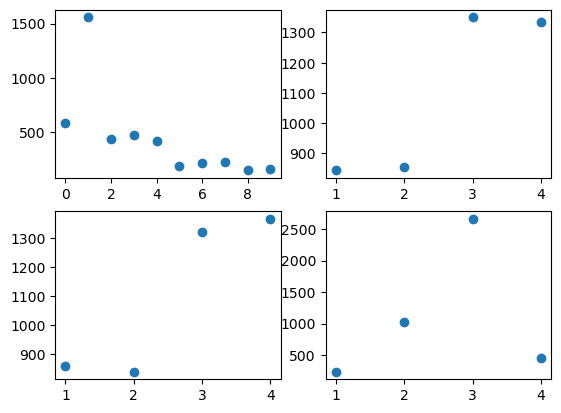

In [ ]:
fig, axes = plt.subplots(2,2)   #poner nombre de graficos y variables
axes[0,0].plot(tabla["empresas_anteriores"].value_counts(),"o")
axes[0,1].plot(tabla["satisfaccion_entorno"].value_counts(),"o")
axes[1,0].plot(tabla["satisfaccion_laboral"].value_counts(),"o")
axes[1,1].plot(tabla["conciliacion_faimilar_laboral"].value_counts(),"o")

(array([2., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 239. ,  481.1,  723.2,  965.3, 1207.4, 1449.5, 1691.6, 1933.7,
        2175.8, 2417.9, 2660. ]),
 <BarContainer object of 10 artists>)

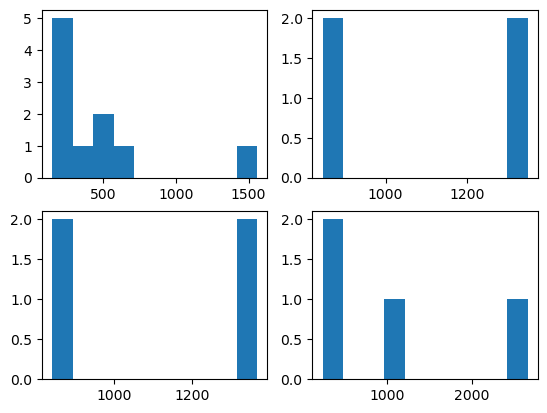

In [ ]:
fig, axes = plt.subplots(2,2)   #poner nombre de graficos y variables
axes[0,0].hist(tabla["empresas_anteriores"].value_counts())
axes[0,1].hist(tabla["satisfaccion_entorno"].value_counts())
axes[1,0].hist(tabla["satisfaccion_laboral"].value_counts())
axes[1,1].hist(tabla["conciliacion_faimilar_laboral"].value_counts())

In [ ]:
# crear dataset
base = tabla.groupby(['empresas_anteriores'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='empresas_anteriores', y='count', barmode ='group', title ='<b>Empresas anteriores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Empresas anteriores',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = tabla.groupby(['satisfaccion_entorno'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='satisfaccion_entorno', y='count', barmode ='group', title ='<b>Satisfaccion entorno<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Satisfaccion entorno',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = tabla.groupby(['satisfaccion_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='satisfaccion_laboral', y='count', barmode ='group', title ='<b>Satisfaccion laboral<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Satisfaccion laboral',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = tabla.groupby(['conciliacion_faimilar_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='conciliacion_faimilar_laboral', y='count', barmode ='group', title ='<b>Conciliación familial-laboral<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Conciliación familial-laboral',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = tabla.groupby(['años_de_trabajo'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.histogram(base, x='años_de_trabajo', y='count', barmode ='group', title ='<b>Años de trabajo<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Cantidad',
    xaxis_title = 'Años de trabajo',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
tabla["empresas_anteriores"]=tabla["empresas_anteriores"].apply(lambda x: x if not pd.isnull(x) else int(tabla["empresas_anteriores"].median()))
tabla["satisfaccion_entorno"]=tabla["satisfaccion_entorno"].apply(lambda x: x if not pd.isnull(x) else int(tabla["satisfaccion_entorno"].median()))
tabla["satisfaccion_laboral"]=tabla["satisfaccion_laboral"].apply(lambda x: x if not pd.isnull(x) else int(tabla["satisfaccion_laboral"].median()))
tabla["conciliacion_faimilar_laboral"]=tabla["conciliacion_faimilar_laboral"].apply(lambda x: x if not pd.isnull(x) else int(tabla["conciliacion_faimilar_laboral"].median()))
tabla["años_de_trabajo"]=tabla["años_de_trabajo"].apply(lambda x: x if not pd.isnull(x) else int(tabla["años_de_trabajo"].mean()))

In [ ]:
tabla.isnull().sum()

edad                             0
desercion_año_anterior           0
frecuencia_viajes                0
departamento                     0
distancia_domicilio              0
educacion                        0
formacion                        0
conteo_de_empleados              0
ID                               0
genero                           0
nivel_de_cargo                   0
nombre_cargo                     0
estado_civil                     0
ingresos_mensuales               0
empresas_anteriores              0
edad>18                          0
porcentaje_aumentosalario        0
horas_trabajo                    0
nivel_de_opciones                0
años_de_trabajo                  0
numero_capacitaciones            0
años_empresa                     0
años_desde_acenso                0
años_jefe_actual                 0
satisfaccion_entorno             0
satisfaccion_laboral             0
conciliacion_faimilar_laboral    0
implicacion_laboral              0
rendimiento         

# DUPLICADOS

In [ ]:
tabla[tabla.duplicated()]

,edad,desercion_año_anterior,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,conteo_de_empleados,ID,genero,...,numero_capacitaciones,años_empresa,años_desde_acenso,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,rendimiento,tiempo_prom_dia


# ANALISIS UNIVARIADO

### VARIABLES NUMERICAS

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)

        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

num_cols = [col for col in tabla.columns if tabla[col].dtypes != "O"]
num_cols.pop(0)

for col in num_cols:
    num_summary(tabla, col, plot=False)

count    4410.000000
mean        9.192517
std         8.105026
min         1.000000
5%          1.000000
10%         1.000000
20%         2.000000
30%         3.000000
40%         5.000000
50%         7.000000
60%         9.000000
70%        11.000000
80%        17.000000
90%        23.000000
95%        26.000000
99%        29.000000
max        29.000000
Name: distancia_domicilio, dtype: float64
count    4410.000000
mean        2.912925
std         1.023933
min         1.000000
5%          1.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         3.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         4.000000
95%         4.000000
99%         5.000000
max         5.000000
Name: educacion, dtype: float64
count    4410.000000
mean        2.063946
std         1.106689
min         1.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         2.000000
50%         2.000000
60

##### INGRESOS MENSUALES

In [ ]:
base = tabla.groupby(['ingresos_mensuales'])[['distancia_domicilio']].count().reset_index().sort_values('distancia_domicilio', ascending = False).rename(columns ={'distancia_domicilio':'count'})

# crear gráfica
fig = px.histogram(base, x='ingresos_mensuales', y='count', title ='<b>Ingresos_mensuales<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Ingresos mensuales',
    yaxis_title = 'Cantidad de personas',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
base=tabla['ingresos_mensuales']
# crear gráfica
fig = px.box(base, x='ingresos_mensuales', title ='<b>Ingresos mensuales<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Ingresos mensuales',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### EDAD

In [ ]:
base = tabla.groupby(['edad'])[['distancia_domicilio']].count().reset_index().sort_values('distancia_domicilio', ascending = False).rename(columns ={'distancia_domicilio':'count'})

# crear gráfica
fig = px.histogram(base, x='edad', y='count', title ='<b>Edad<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Edad',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla['edad']
# crear gráfica
fig = px.box(base, x='edad', title ='<b>Edad<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Edad',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### DISTANCIA


In [ ]:
base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.histogram(base, x='distancia_domicilio', y='count', title ='<b>Distancia del domicilio<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Distancia del domicilio',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla['distancia_domicilio']
# crear gráfica
fig = px.box(base, x='distancia_domicilio', title ='<b>Distancia del domicilio<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Distancia del domicilio',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NUMERO DE EMPRESAS ANTERIORES

In [ ]:
base = tabla.groupby(['empresas_anteriores'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.bar(base, x='empresas_anteriores', y='count', title ='<b>Empresas anteriores de los empleados<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Empresas anteriores',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla["empresas_anteriores"]
# crear gráfica
fig = px.box(base, x='empresas_anteriores', title ='<b>Empresas anteriores de los empleados<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Empresa anteriores',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### PORCENTAJE AUMENTO DEL SALARIO

In [ ]:
base = tabla.groupby(['porcentaje_aumentosalario'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.histogram(base, x='porcentaje_aumentosalario', y='count', title ='<b>Porcentaje aumento del salario de los empleados ultimo año<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Porcentaje de aumento de salario',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla["porcentaje_aumentosalario"]
# crear gráfica
fig = px.box(base, x='porcentaje_aumentosalario', title ='<b>Porcentaje aumento del salario de los empleados ultimo año<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Porcentaje aumento de salario',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### AÑOS DE TRABAJO DE LOS EMPLEADOS

In [ ]:
base = tabla.groupby(['años_de_trabajo'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.histogram(base, x='años_de_trabajo', y='count', title ='<b>Años de experiencia de los trabajadores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Años de experiencia',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
#base = tabla.groupby(['distancia_domicilio'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
base=tabla["años_de_trabajo"]
# crear gráfica
fig = px.box(base, x='años_de_trabajo', title ='<b>Años de experiencia de los trabajadores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    yaxis_title = 'Años de experiencia',
    xaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NUMERO DE CAPACITACIONES - SE VA A TRABAJAR COMO CATEGORIAS

In [ ]:
tabla["numero_capacitaciones"].unique()

array([6, 3, 2, 5, 4, 0, 1], dtype=int64)

##### AÑOS_EMPRESA

In [ ]:
tabla["años_empresa"].unique()

array([ 1,  5,  8,  6,  7,  0,  9, 20, 15, 36, 10,  3, 17,  2,  4, 11, 22,
       18, 13, 24, 21, 16, 25, 29, 27, 14, 31, 32, 34, 26, 12, 19, 33, 30,
       23, 37, 40], dtype=int64)

##### AÑOS DESDE EL ULTIMPO ACENSO

In [ ]:
tabla["años_desde_acenso"].unique()

array([ 0,  1,  7,  4, 10,  9,  6, 11,  3,  5,  2,  8, 13, 12, 15, 14],
      dtype=int64)

##### AÑOS CON EL JEFE ACTUAL

In [ ]:
tabla["años_jefe_actual"].unique()

array([ 0,  4,  3,  5,  7,  8, 10, 11, 13,  9,  1,  2,  6, 12, 17, 16, 15,
       14], dtype=int64)

##### TIEMPO PROMEDIO DIARIO DE ACTIVIDAD DEL EMPLEADO



In [ ]:
base = tabla["tiempo_prom_dia"]
# crear gráfica
fig = px.histogram(base, x='tiempo_prom_dia', title ='<b>Tiempo promedio diaria de actividad de los trabajadores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Tiempo promedio',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
base = tabla["tiempo_prom_dia"]
# crear gráfica
fig = px.box(base, x='tiempo_prom_dia', title ='<b>Tiempo promedio diaria de actividad de los trabajadores<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Tiempo promedio',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

### VARABLES CATEGORICAS

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in tabla.columns if tabla[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(tabla, col, plot=False)

     desercion_año_anterior      Ratio
No                     3699  83.877551
Yes                     711  16.122449
##########################################
                   frecuencia_viajes      Ratio
Travel_Rarely                   3129  70.952381
Travel_Frequently                831  18.843537
Non-Travel                       450  10.204082
##########################################
                        departamento      Ratio
Research & Development          2883  65.374150
Sales                           1338  30.340136
Human Resources                  189   4.285714
##########################################
                  formacion      Ratio
Life Sciences          1818  41.224490
Medical                1392  31.564626
Marketing               477  10.816327
Technical Degree        396   8.979592
Other                   246   5.578231
Human Resources          81   1.836735
##########################################
        genero  Ratio
Male      2646   60.0
Female    

##### IMPLICACION LABORAL

In [ ]:
# crear dataset
base = tabla.groupby(['implicacion_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='implicacion_laboral', values='count', title ='<b>Implicacion laboral<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Implicacion laboral',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### CONCILIACION LABORAL Y FAMILIAR-- MEJORAR NOMBRE

In [ ]:
# crear dataset
base = tabla.groupby(['conciliacion_faimilar_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='conciliacion_faimilar_laboral', values='count', title ='<b>Conciliacion laboral y familiar<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Conciliacion laboral y familiar',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### SATISFACCION LABORAL

In [ ]:
# crear dataset
base = tabla.groupby(['satisfaccion_laboral'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='satisfaccion_laboral', values='count', title ='<b>Satisfaccion laboral<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Satisfaccion laboral',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### SATISFACCION DEL ENTORNO

In [ ]:
# crear dataset
base = tabla.groupby(['satisfaccion_entorno'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='satisfaccion_entorno', values='count', title ='<b>Satisfaccion del entorno<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Satisfaccion del entorno',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NIVEL_DE_OPCIONES_ CORREGIR POR UN MEJOR NOMBRRE

In [ ]:
# crear dataset
base = tabla.groupby(['nivel_de_opciones'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='nivel_de_opciones', values='count', title ='<b>Nivel de opciones<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Nivel de opciones',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NIVEL DE CARGO

In [ ]:
# crear dataset
base = tabla.groupby(['nivel_de_cargo'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='nivel_de_cargo', values='count', title ='<b>Nivel de cargo<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Nivel de cargo',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### EDUCACION

In [ ]:
# crear dataset
base = tabla.groupby(['educacion'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='educacion', values='count', title ='<b>Nivel de educacion<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Nivel de educacion',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### DECERSION

In [ ]:
# crear dataset
base = tabla.groupby(['desercion_año_anterior'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='desercion_año_anterior', y='count', title ='<b>Decersion<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Desercion',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### FRECUENCIA DE VIAJES

In [ ]:
# crear dataset
base = tabla.groupby(['frecuencia_viajes'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='frecuencia_viajes', y='count', title ='<b>Frecuencia de viajes de los empleados<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Frecuencia de viajes',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### DEPARTAMENTO

In [ ]:
# crear dataset
base = tabla.groupby(['departamento'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='departamento', y='count', title ='<b>Departamento<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Departamento',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### FORMACION

In [ ]:
# crear dataset
base = tabla.groupby(['formacion'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='formacion', y='count', title ='<b>Formacion academica<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Formacion',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### GENERO


In [ ]:
# crear dataset
base = tabla.groupby(['genero'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='genero', values='count', title ='<b>Genero<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Genero',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### NOMBRE DEL CARGO


In [ ]:
# crear dataset
base = tabla.groupby(['nombre_cargo'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})
#base['work_year'] = base['work_year'].astype('string')

# crear gráfica
fig = px.bar(base, x='nombre_cargo', y='count', title ='<b>Nombre del cargo<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Nombre del cargo',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### ESTADO CIVIL


In [ ]:
# crear dataset
base = tabla.groupby(['estado_civil'])[['edad']].count().reset_index().sort_values('edad', ascending = False).rename(columns ={'edad':'count'})

# crear gráfica
fig = px.pie(base, names='estado_civil', values='count', title ='<b>Estado civil<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Estado civil',
    yaxis_title = 'Cantidad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

##### EDAD>18

# ANALISIS BIVARIADO

#### INGRESOS MENSUALES VS DESERCION

In [ ]:
# crear dataset
base = tabla.groupby(['desercion_año_anterior'])[['ingresos_mensuales']].mean().reset_index().sort_values('ingresos_mensuales', ascending = True)

# crear gráfica
fig = px.bar(base, x='desercion_año_anterior', y='ingresos_mensuales', barmode ='group', title ='<b>Desercion laboral segun ingresos de los empledos<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Decersion laboral',
    yaxis_title = 'Ingresos',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

hacer boxplot

#### EDAD VS DESERCION

In [ ]:
# crear dataset
base = tabla.groupby(['desercion_año_anterior'])[['edad']].mean().reset_index().sort_values('edad', ascending = True)

# crear gráfica
fig = px.bar(base, x='desercion_año_anterior', y='edad', barmode ='group', title ='<b>Desercion laboral segun la edad<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Decersion laboral',
    yaxis_title = 'edad',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

# ANALISIS RELACION ENTRE VARIABLES NUMERICAS

In [ ]:
tabla.dtypes

edad                               int64
desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
genero                            object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones              int64
años_empresa                       int64
años_desde_acenso                  int64
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
rendimiento     

<Axes: >

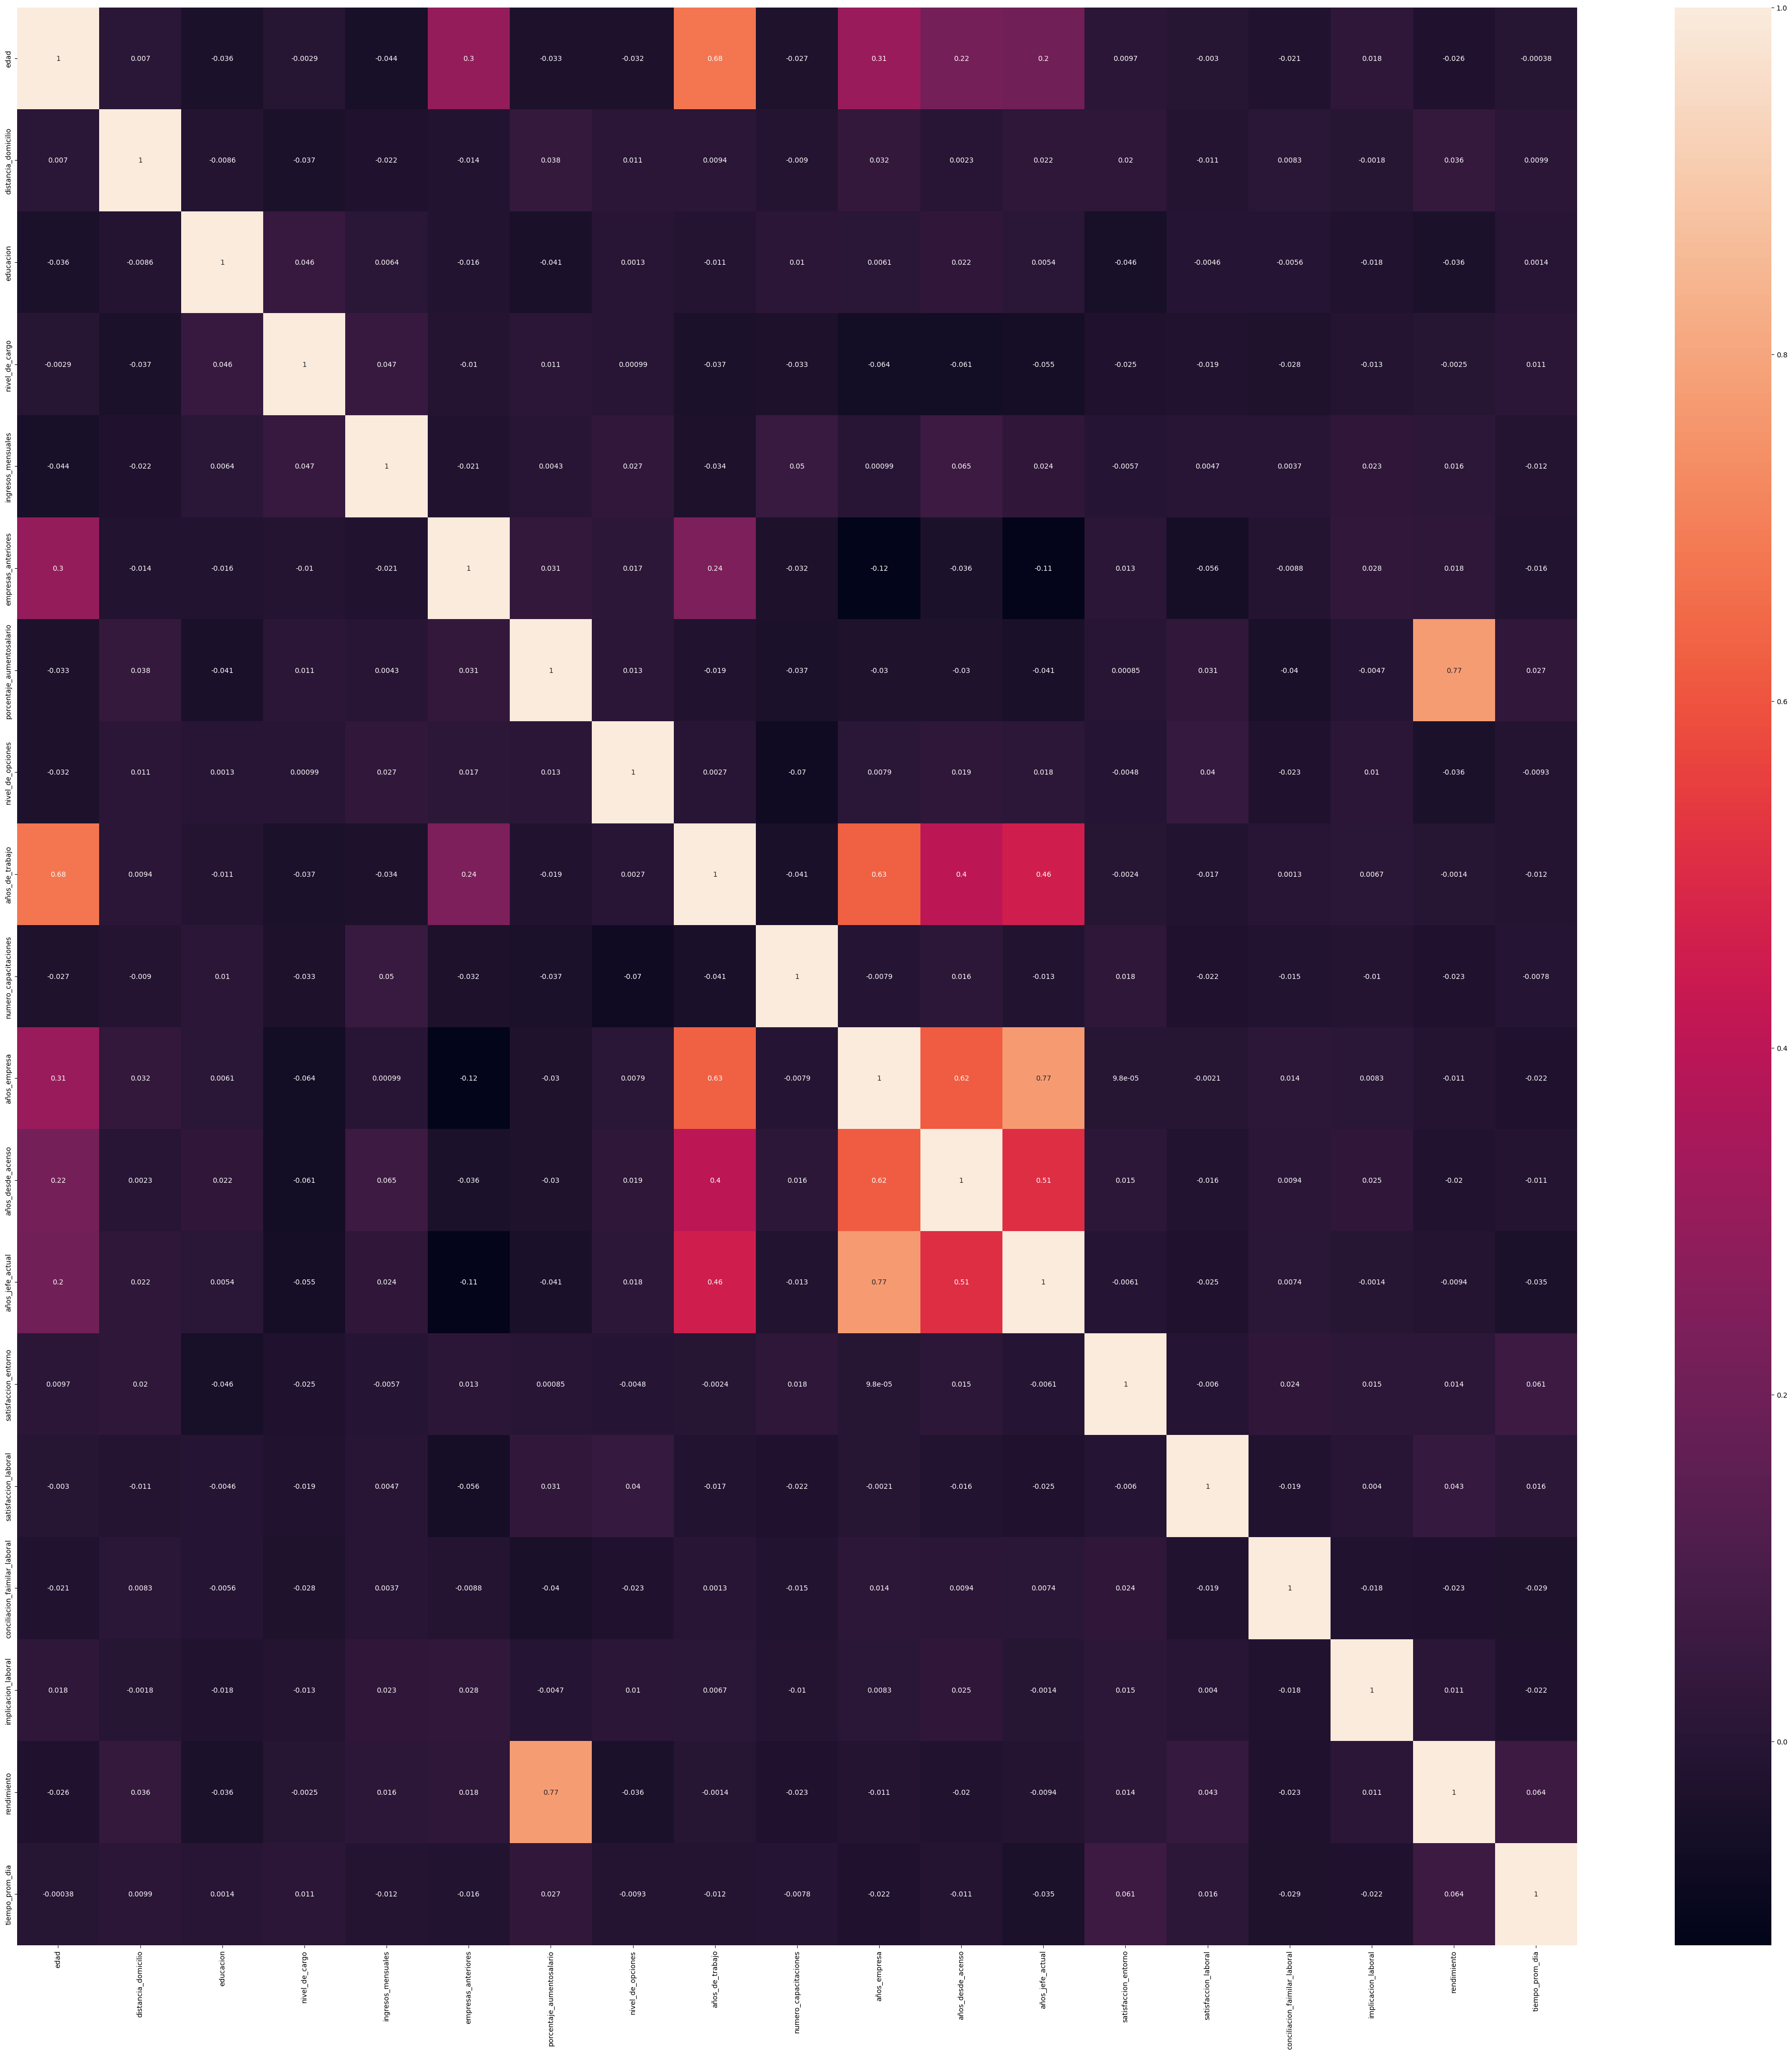

In [ ]:

from matplotlib.pyplot import figure
figure(figsize=(50,50))
sns.heatmap(tabla.corr(), annot = True)

In [ ]:
corr_matrix = tabla.corr()
corr_matrix

,edad,distancia_domicilio,educacion,conteo_de_empleados,ID,nivel_de_cargo,ingresos_mensuales,empresas_anteriores,porcentaje_aumentosalario,horas_trabajo,...,numero_capacitaciones,años_empresa,años_desde_acenso,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,rendimiento,tiempo_prom_dia
edad,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.298869,-0.033137,NaN,...,-0.027308,0.311309,0.216513,0.202089,0.009699,-0.003003,-0.020524,0.018196,-0.025563,-0.000377
distancia_domicilio,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013514,0.038125,NaN,...,-0.009001,0.031684,0.002290,0.021584,0.020113,-0.011213,0.008305,-0.001837,0.036418,0.009927
educacion,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016195,-0.040531,NaN,...,0.010472,0.006080,0.022490,0.005358,-0.045636,-0.004612,-0.005610,-0.018279,-0.035591,0.001406
conteo_de_empleados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.000789,-0.004456,NaN,...,-0.010191,0.004086,0.000256,0.008579,0.000455,-0.001024,-0.002164,0.008591,-0.006892,-0.010239
nivel_de_cargo,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.010116,0.010973,NaN,...,-0.032500,-0.064219,-0.060811,-0.055251,-0.024540,-0.018596,-0.027763,-0.012630,-0.002474,0.011067
ingresos_mensuales,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020515,0.004325,NaN,...,0.050112,0.000995,0.065219,0.024304,-0.005747,0.004716,0.003705,0.023346,0.016093,-0.012430
empresas_anteriores,0.298869,-0.013514,-0.016195,NaN,-0.000789,-0.010116,-0.020515,1.000000,0.031062,NaN,...,-0.032225,-0.117490,-0.036326,-0.109207,0.013060,-0.055585,-0.008844,0.027994,0.018135,-0.015900
porcentaje_aumentosalario,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.031062,1.000000,NaN,...,-0.037392,-0.029707,-0.029542,-0.040864,0.000850,0.030626,-0.040305,-0.004658,0.773550,0.026640
horas_trabajo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ANALISIS RELACION DE VARIABLES CATEGORICAS